In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the dataset
data_url = "/content/drive/MyDrive/Prodigy/Mall_Customers.csv"
data = pd.read_csv(data_url)

In [5]:
# Display basic info about the dataset
print("Dataset Shape:", data.shape)
print(data.info())

Dataset Shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
# Inspect the first few rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:

# Drop unnecessary columns and handle missing values
# (Assuming there might be irrelevant columns like customer IDs)
data.dropna(inplace=True)  # Drop rows with missing values

# Check for duplicates
data.drop_duplicates(inplace=True)

In [8]:
# Inspect numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Features:", numerical_features)


Numerical Features: Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [9]:
# Scale the data for K-means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_features])


In [10]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

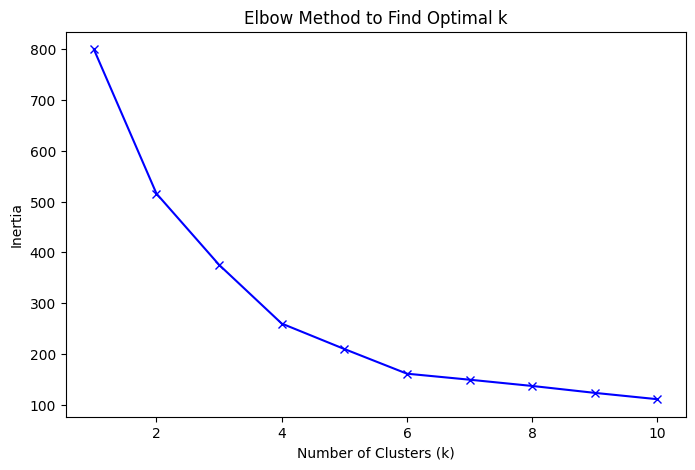

In [11]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()


In [12]:
# From the Elbow Method, choose the optimal number of clusters (e.g., 3 or 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [13]:
# Assign cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

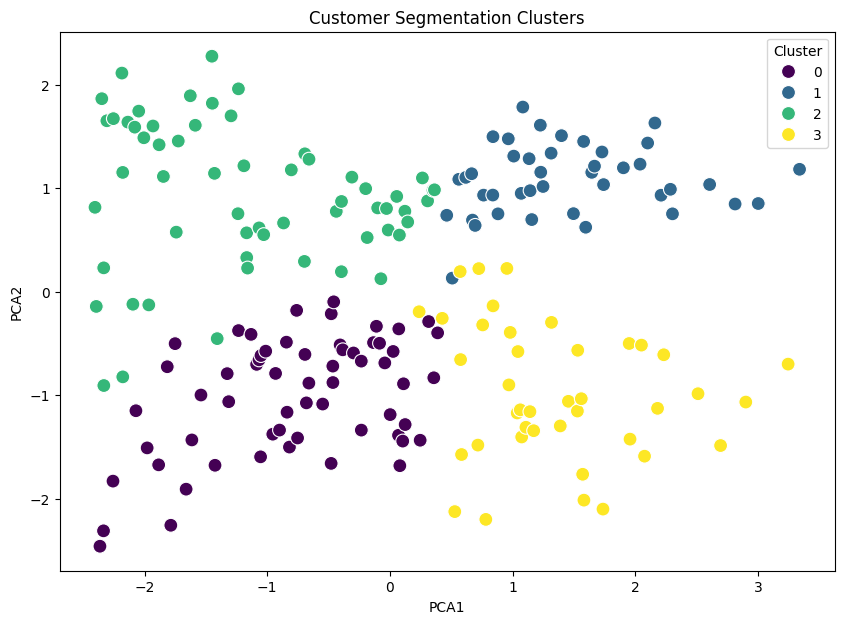

In [14]:
# Visualize the clusters (assuming 2D PCA visualization for simplicity)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segmentation Clusters')
plt.show()

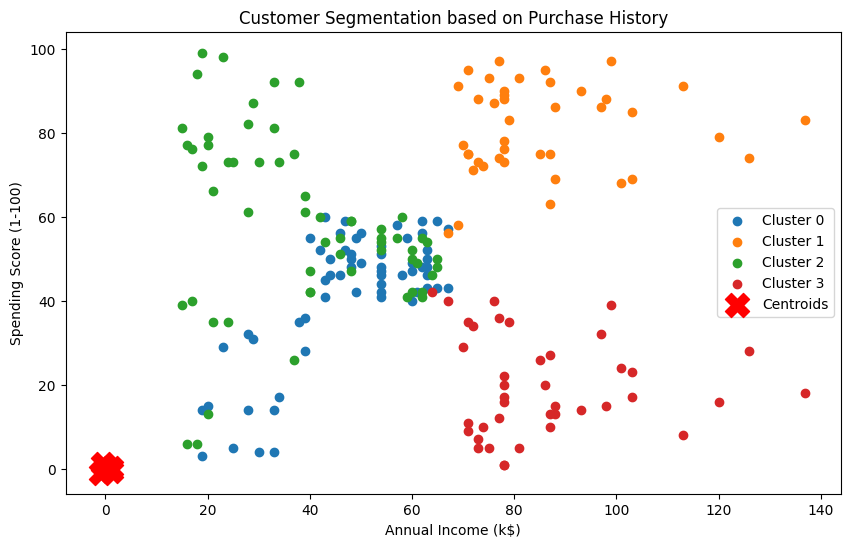

In [18]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    # Use 'Annual Income (k$)' and 'Spending Score (1-100)' for visualization
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Customer Segmentation based on Purchase History')
plt.xlabel('Annual Income (k$)')  # Update x-axis label
plt.ylabel('Spending Score (1-100)')  # Update y-axis label
plt.legend()
plt.show()

In [15]:
# Display cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centroids:")
print(pd.DataFrame(centroids, columns=numerical_features))

# Save the clustered data
data.to_csv("customer_clusters.csv", index=False)
print("Clustered data saved to customer_clusters.csv.")


Cluster Centroids:
   CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
0   69.350000  54.766667           47.933333               41.783333
1  160.048780  32.731707           85.634146               80.902439
2   50.610169  25.949153           38.779661               58.067797
3  159.775000  40.275000           85.925000               19.750000
Clustered data saved to customer_clusters.csv.
